#Preparation

##Installer

In [ ]:
import pandas as pd
import re
import numpy as np
import itertools

##Dataset

In [ ]:
dir = '/content/cleveland.data'

In [ ]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

In [ ]:
lines[0:10]

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

In [ ]:
data = itertools.takewhile(
  lambda x: len(x) == 76,
  (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

In [ ]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [ ]:
df = df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

#Validasi Data

In [ ]:
df.replace(-9.0, np.nan, inplace=True)

In [ ]:
df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

#Menentukan Object Data

In [ ]:
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [ ]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [ ]:
column_mapping = {
  2: 'age',
  3: 'sex',
  8: 'cp',
  9: 'trestbps',
  11: 'chol',
  15: 'fbs',
  18: 'restecg',
  31: 'thalach',
  37: 'exang',
  39: 'oldpeak',
  40: 'slope',
  43: 'ca',
  50: 'thal',
  57: 'target'
}
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-17-7edacf18f960>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [ ]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0.0       1
59.0  1.0  1.0  178.0     270.0  0.0  2.0      145.0    0.0    4.2      3.0    0.0  7.0   0.0       1
           4.0  138.0     271.0  0.0  2.0      182.0    0.0    0.0      1.0    0.0  3.0   0.0       1
                135.0     234.0  0.0  0.0      161.0    0.0    0.5      2.0    0.0  7.0   0.0       1
                110.0     239.0  0.0  2.0      142.0    1.0    1.2      2.0    1.0  7.0   2.0       1
                                                                                                   ..
51.0  1.0  4.0  140.0     298.0  0.0  0.0      122.0    1.0    4.2      2.0    3.0  7.0   3.0       1
                          299.0  0.0  0.0      173.0    1.0    1.6      1.0    0.0  7.0   1.0       1
52.0  0.0  3.0  136.0     196.0  0.0  2.0      169.0    0.0    0.1      2.0    0.0  3.0

#Data Cleaning

In [ ]:
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

In [ ]:
columns_to_drop = ['ca', 'slope','thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [ ]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [ ]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [ ]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

In [ ]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
              'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  target    282 non-null    float64
dtypes: float64(11)
memory usage: 24.4 KB


In [ ]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [ ]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [ ]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [ ]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [ ]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0


In [ ]:
dfClean['target'].value_counts()

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: target, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.487529


<Axes: >

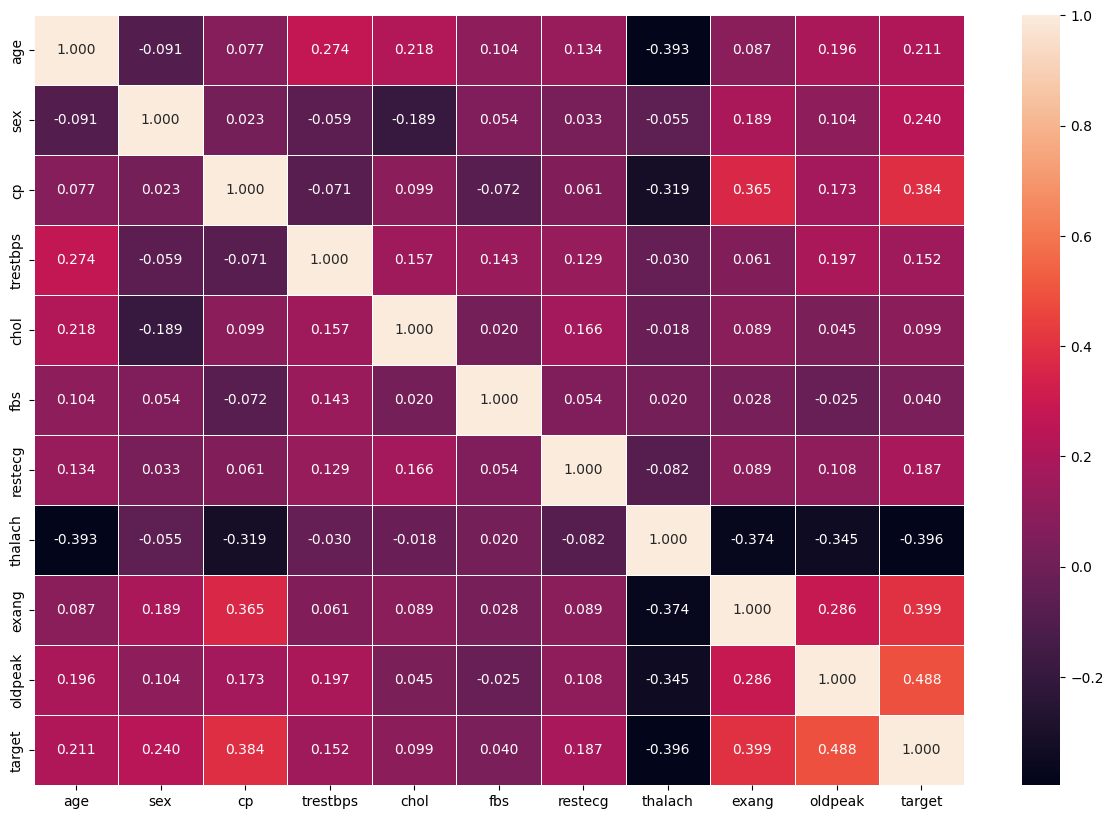

In [ ]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

#Data Construct

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 281
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  target    282 non-null    float64
dtypes: float64(11)
memory usage: 26.4 KB


In [ ]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0


In [ ]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

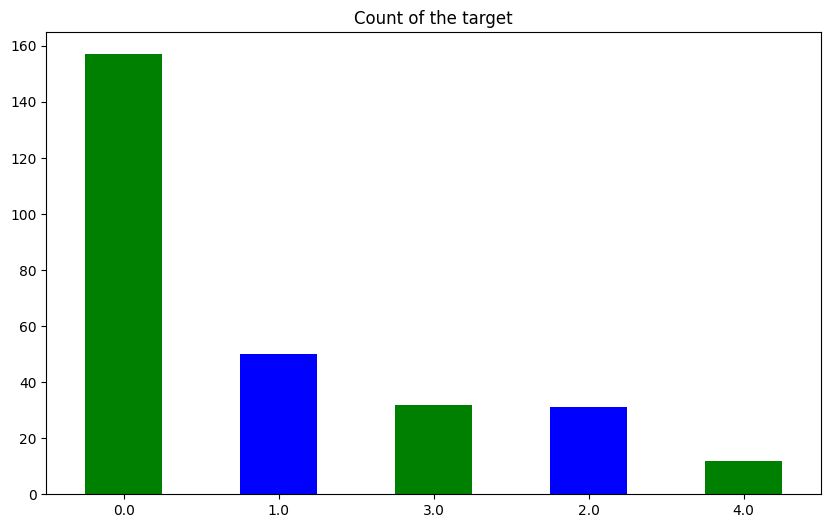

In [ ]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

#Over Sampling

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [ ]:
new_df1 = pd.DataFrame(data=y)

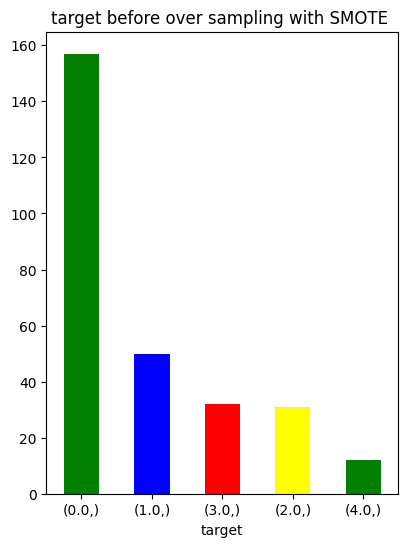

In [ ]:
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

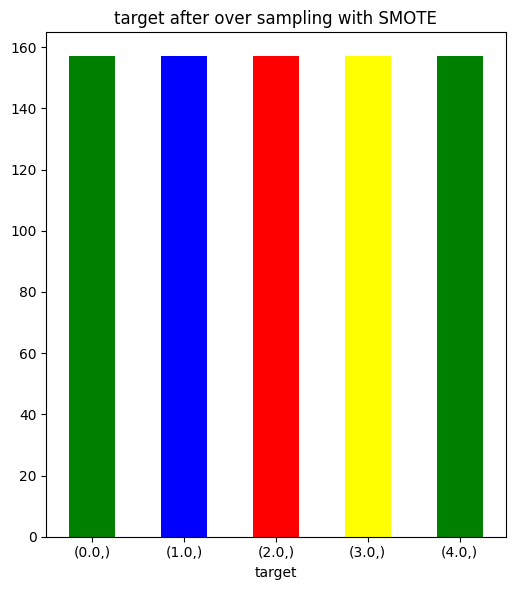

In [ ]:
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [ ]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       157
1.0        50
3.0        32
2.0        31
4.0        12
dtype: int64

In [ ]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       157
1.0       157
2.0       157
3.0       157
4.0       157
dtype: int64

In [ ]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

785

In [ ]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.559464,0.780670,0.811714,0.374562,0.285381,0.139624,0.602408,0.542282,0.455827,0.238190
std,0.168535,0.374987,0.283240,0.149318,0.111148,0.309894,0.441362,0.161043,0.443229,0.180595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.659984,0.666667,0.264151,0.207870,0.000000,0.000000,0.423142,0.000000,0.092091
50%,0.583333,1.000000,1.000000,0.358491,0.280822,0.000000,0.887086,0.543578,0.348039,0.225806
75%,0.678864,1.000000,1.000000,0.469468,0.356164,0.000000,1.000000,0.668935,1.000000,0.370968
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# membagi fitur dan target menjadi data train dan test (untuk yang raw saja)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

#Model

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [ ]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3), 'recall': round(rcl,3), 'F1 score': round(f1,3), 'Precision score': round(ps,3)}
    return print(metric_dict)

##Raw

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

###Decision Tree

In [ ]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train_raw, y_train_raw)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = tree_model.predict(X_test_raw)
# Evaluate the KNN model
print("Decision Tree Model:")
accuracy_tree = round(accuracy_score(y_test_raw,y_pred_tree),3)
print("Accuracy:", accuracy_tree)
print("Classification Report:")
print(classification_report(y_test_raw, y_pred_tree))

Decision Tree Model:
Accuracy: 0.579
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74        32
         1.0       0.36      0.50      0.42        10
         2.0       0.60      0.50      0.55         6
         3.0       0.17      0.14      0.15         7
         4.0       0.50      0.50      0.50         2

    accuracy                           0.58        57
   macro avg       0.48      0.47      0.47        57
weighted avg       0.59      0.58      0.58        57



In [ ]:
evaluation(y_test_raw,y_pred_tree)

{'accuracy': 0.579, 'recall': 0.579, 'F1 score': 0.583, 'Precision score': 0.594}


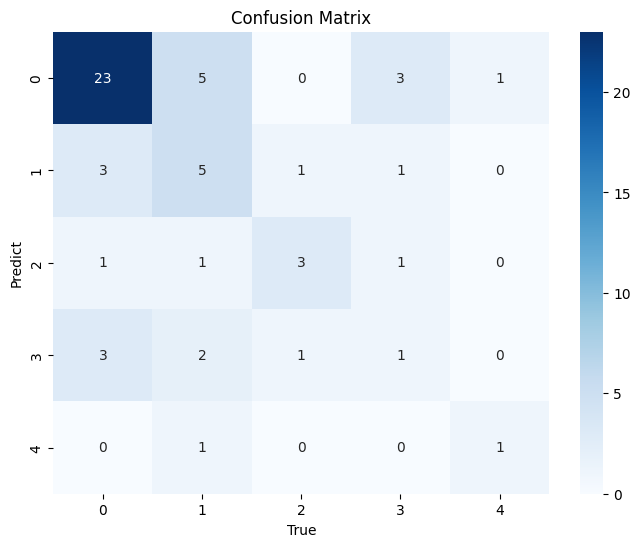

In [ ]:
cm = confusion_matrix(y_test_raw, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train_raw, y_train_raw)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = tree_model.predict(X_test_raw)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn = round(accuracy_score(y_test_raw,y_pred_knn),3)
print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test_raw, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.579
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74        32
         1.0       0.36      0.50      0.42        10
         2.0       0.60      0.50      0.55         6
         3.0       0.17      0.14      0.15         7
         4.0       0.50      0.50      0.50         2

    accuracy                           0.58        57
   macro avg       0.48      0.47      0.47        57
weighted avg       0.59      0.58      0.58        57



In [ ]:
evaluation(y_test_raw,y_pred_knn)

{'accuracy': 0.579, 'recall': 0.579, 'F1 score': 0.583, 'Precision score': 0.594}


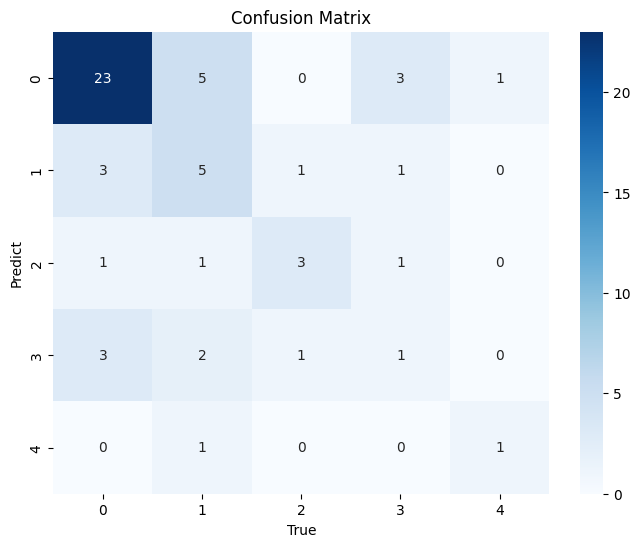

In [ ]:
cm = confusion_matrix(y_test_raw, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_raw, y_train_raw)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_raw)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test_raw, y_pred_rf),3)
print("Accuracy:",accuracy_rf)
print("Classification Report:")
print(classification_report(y_test_raw, y_pred_rf))


Random Forest Model:
Accuracy: 0.632
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.97      0.84        32
         1.0       0.50      0.30      0.37        10
         2.0       0.00      0.00      0.00         6
         3.0       0.40      0.29      0.33         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.63        57
   macro avg       0.33      0.31      0.31        57
weighted avg       0.55      0.63      0.58        57



In [ ]:
evaluation(y_test_raw,y_pred_rf)

{'accuracy': 0.632, 'recall': 0.632, 'F1 score': 0.577, 'Precision score': 0.551}


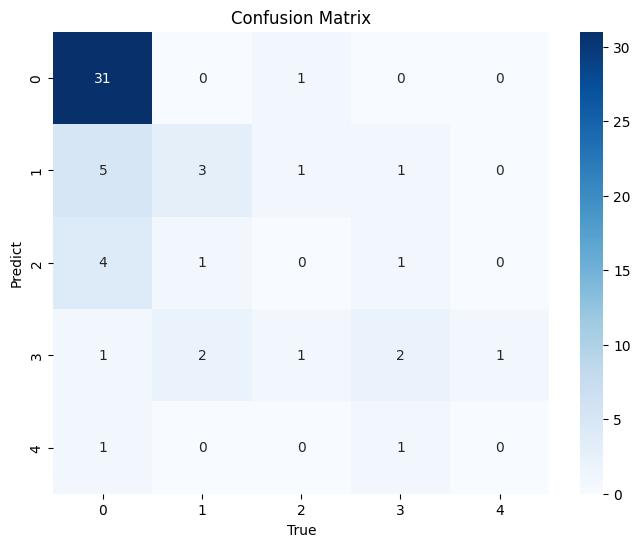

In [ ]:
cm = confusion_matrix(y_test_raw, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###XGBoost

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_raw, y_train_raw)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_raw)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb = round(accuracy_score(y_test_raw, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb)
print("Classification Report:")
print(classification_report(y_test_raw, y_pred_xgb))


XGBoost Model:
Accuracy: 0.649
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        32
         1.0       0.50      0.60      0.55        10
         2.0       0.33      0.33      0.33         6
         3.0       0.50      0.29      0.36         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.65        57
   macro avg       0.43      0.41      0.41        57
weighted avg       0.64      0.65      0.64        57



In [ ]:
evaluation(y_test_raw,y_pred_xgb)

{'accuracy': 0.649, 'recall': 0.649, 'F1 score': 0.642, 'Precision score': 0.644}


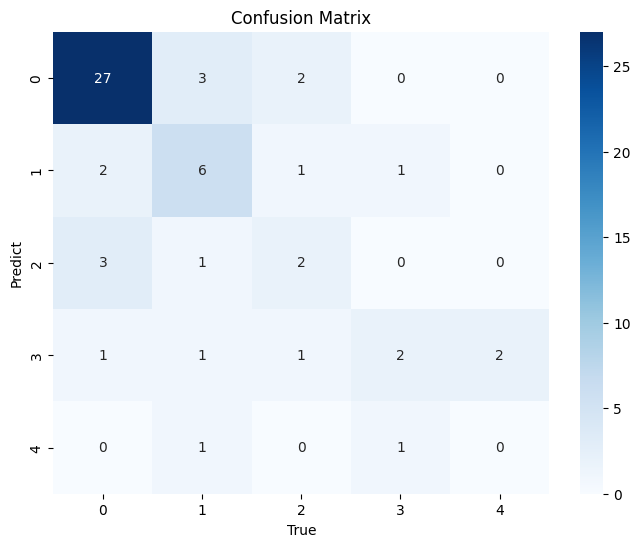

In [ ]:
cm = confusion_matrix(y_test_raw, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##Oversample

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

###Decision Tree

In [ ]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = tree_model.predict(X_test)
# Evaluate the KNN model
print("Decision Tree Model:")
accuracy_tree_smote = round(accuracy_score(y_test,y_pred_tree),3)
print("Accuracy:", accuracy_tree_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Model:
Accuracy: 0.662
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        32
         1.0       0.50      0.48      0.49        31
         2.0       0.79      0.71      0.75        31
         3.0       0.64      0.66      0.65        32
         4.0       0.69      0.77      0.73        31

    accuracy                           0.66       157
   macro avg       0.66      0.66      0.66       157
weighted avg       0.66      0.66      0.66       157



In [ ]:
evaluation(y_test,y_pred_tree)

{'accuracy': 0.662, 'recall': 0.662, 'F1 score': 0.662, 'Precision score': 0.664}


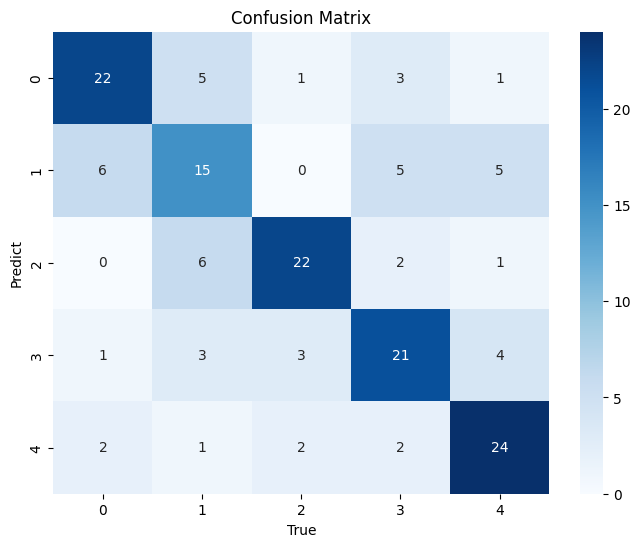

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.688
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54        32
         1.0       0.59      0.71      0.65        31
         2.0       0.76      0.84      0.80        31
         3.0       0.76      0.69      0.72        32
         4.0       0.81      0.68      0.74        31

    accuracy                           0.69       157
   macro avg       0.69      0.69      0.69       157
weighted avg       0.69      0.69      0.69       157



In [ ]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.688, 'recall': 0.688, 'F1 score': 0.688, 'Precision score': 0.694}


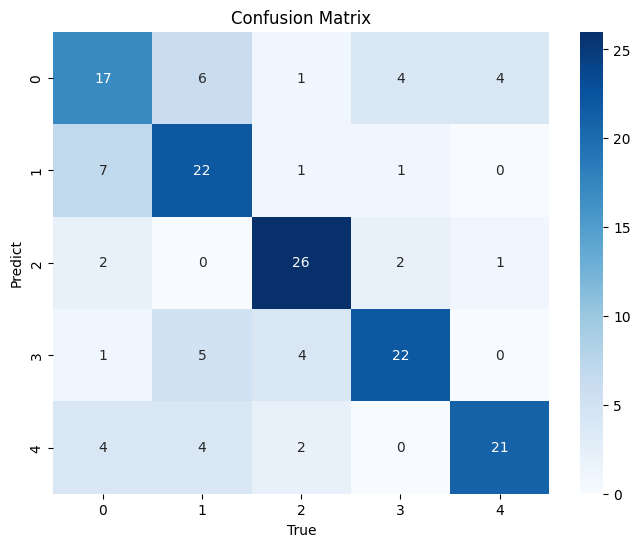

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.911
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92        32
         1.0       0.79      0.87      0.83        31
         2.0       0.88      0.97      0.92        31
         3.0       0.96      0.84      0.90        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.91       157
   macro avg       0.92      0.91      0.91       157
weighted avg       0.92      0.91      0.91       157



In [ ]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.911, 'recall': 0.911, 'F1 score': 0.912, 'Precision score': 0.916}


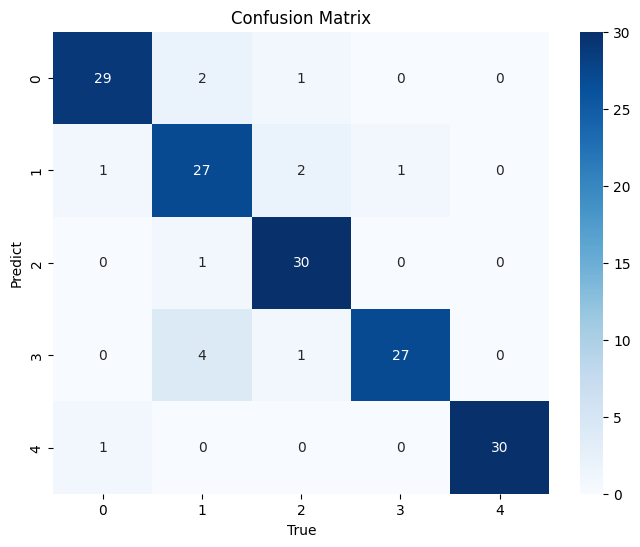

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###XGBoost

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.917
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        32
         1.0       0.93      0.90      0.92        31
         2.0       0.90      0.90      0.90        31
         3.0       0.90      0.88      0.89        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157



In [ ]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.917, 'recall': 0.917, 'F1 score': 0.918, 'Precision score': 0.919}


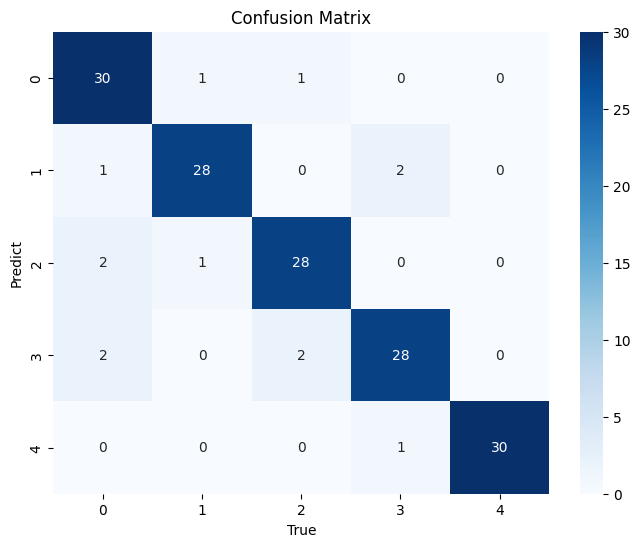

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##Oversample + Normalisasi

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

###Decision Tree

In [ ]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train_normal, y_train_normal)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = tree_model.predict(X_test_normal)
# Evaluate the Decision tree model
print("Decision Tree Model:")
accuracy_tree_smote_normal = round(accuracy_score(y_test_normal,y_pred_tree),3)
print("Accuracy:", accuracy_tree_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_tree))

Decision Tree Model:
Accuracy: 0.688
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74        32
         1.0       0.55      0.55      0.55        31
         2.0       0.81      0.71      0.76        31
         3.0       0.64      0.66      0.65        32
         4.0       0.69      0.81      0.75        31

    accuracy                           0.69       157
   macro avg       0.69      0.69      0.69       157
weighted avg       0.69      0.69      0.69       157



In [ ]:
evaluation(y_test,y_pred_tree)

{'accuracy': 0.688, 'recall': 0.688, 'F1 score': 0.688, 'Precision score': 0.692}


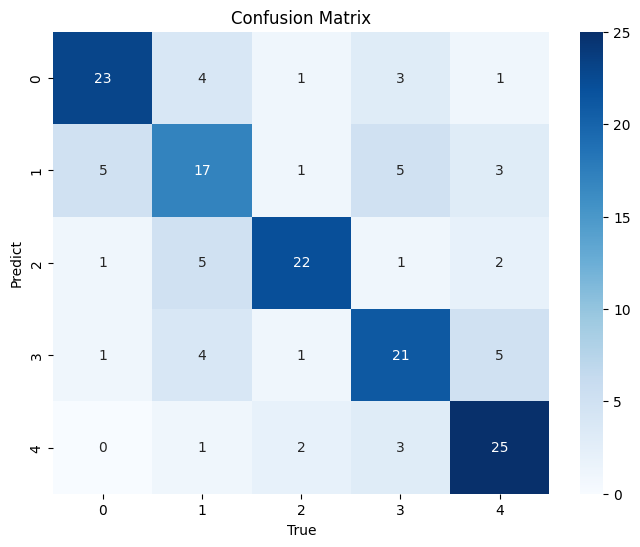

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.803
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        32
         1.0       0.63      0.61      0.62        31
         2.0       0.87      0.87      0.87        31
         3.0       0.85      0.69      0.76        32
         4.0       0.82      1.00      0.90        31

    accuracy                           0.80       157
   macro avg       0.80      0.80      0.80       157
weighted avg       0.80      0.80      0.80       157



In [ ]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.803, 'recall': 0.803, 'F1 score': 0.799, 'Precision score': 0.803}


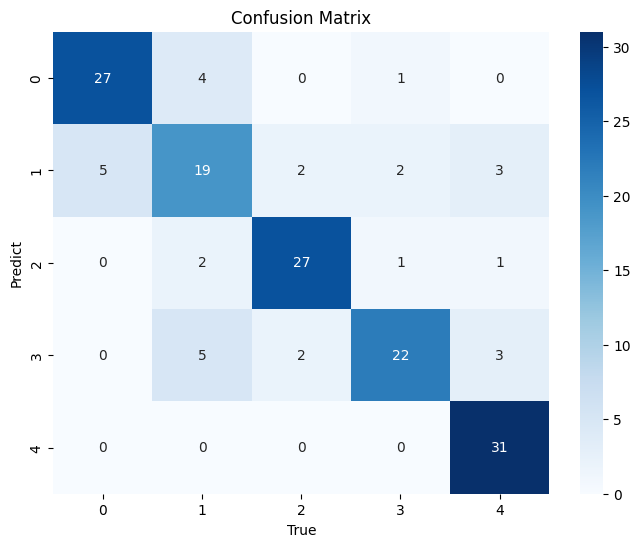

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [ ]:
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.911
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92        32
         1.0       0.79      0.87      0.83        31
         2.0       0.88      0.97      0.92        31
         3.0       0.96      0.84      0.90        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.91       157
   macro avg       0.92      0.91      0.91       157
weighted avg       0.92      0.91      0.91       157



In [ ]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.911, 'recall': 0.911, 'F1 score': 0.912, 'Precision score': 0.916}


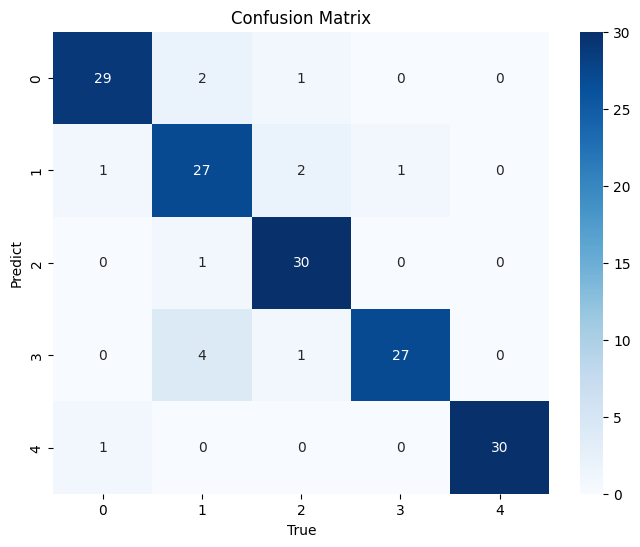

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###XGBoost

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.917
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        32
         1.0       0.93      0.90      0.92        31
         2.0       0.90      0.90      0.90        31
         3.0       0.90      0.88      0.89        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.917, 'recall': 0.917, 'F1 score': 0.918, 'Precision score': 0.919}


In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

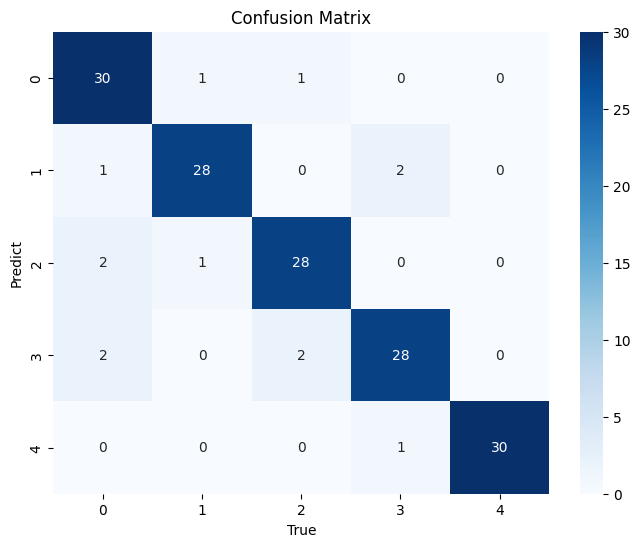

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

##Tunning + Normalization + Oversample

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

###Decision Tree

In [ ]:
tree_model.fit(X_train_normal, y_train_normal)

DecisionTreeClassifier()

In [ ]:
param_grid = {"max_depth": [3, None],
              "max_features": ["sqrt", "log2"],
              "min_samples_leaf": [1, 2],
              "criterion": ["gini", "entropy"]}

In [ ]:
tree_model = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

In [ ]:
tree_model.fit(X_train_normal, y_train_normal)

best_params = tree_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}


In [ ]:
y_pred_tree = tree_model.predict(X_test_normal)

In [ ]:
# Evaluate the Decision Tree model
print("Decision Tree Model:")
accuracy_tree_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_tree),3)
print("Accuracy:", accuracy_tree_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_tree))

Decision Tree Model:
Accuracy: 0.752
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72        32
         1.0       0.57      0.65      0.61        31
         2.0       0.74      0.81      0.77        31
         3.0       0.83      0.78      0.81        32
         4.0       0.90      0.84      0.87        31

    accuracy                           0.75       157
   macro avg       0.76      0.75      0.75       157
weighted avg       0.76      0.75      0.75       157



In [ ]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.803, 'recall': 0.803, 'F1 score': 0.799, 'Precision score': 0.803}


In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

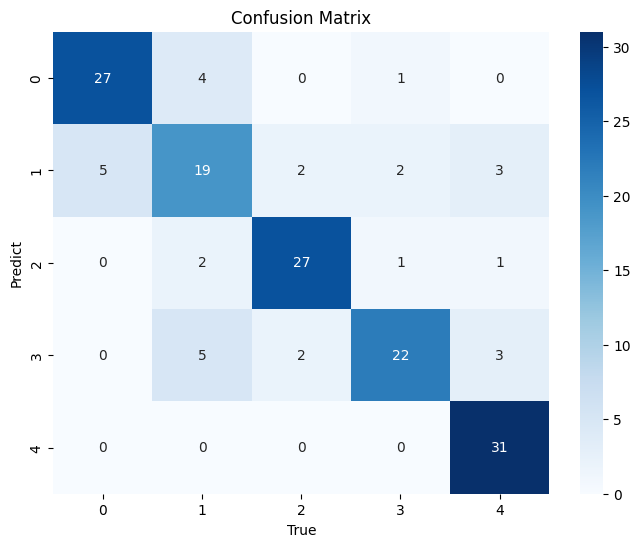

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###KNN

In [ ]:
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

In [ ]:
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

In [ ]:
knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'kd_tree'}


In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)

In [ ]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.879
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.92        32
         1.0       0.83      0.77      0.80        31
         2.0       0.82      0.90      0.86        31
         3.0       0.90      0.88      0.89        32
         4.0       0.86      1.00      0.93        31

    accuracy                           0.88       157
   macro avg       0.88      0.88      0.88       157
weighted avg       0.88      0.88      0.88       157



In [ ]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.879, 'recall': 0.879, 'F1 score': 0.879, 'Precision score': 0.884}


In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

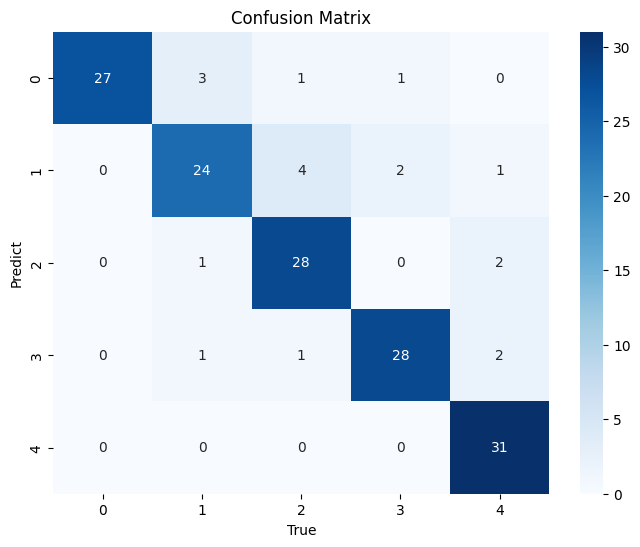

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###Random Forest

In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
    # "random_state": [42, 100, 200]
}

In [ ]:
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

In [ ]:
rf_model.fit(X_train_normal, y_train_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]})

In [ ]:
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

In [ ]:
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        32
         1.0       0.85      0.90      0.88        31
         2.0       0.91      1.00      0.95        31
         3.0       0.96      0.84      0.90        32
         4.0       1.00      0.97      0.98        31

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157



In [ ]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.93, 'Precision score': 0.933}


In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

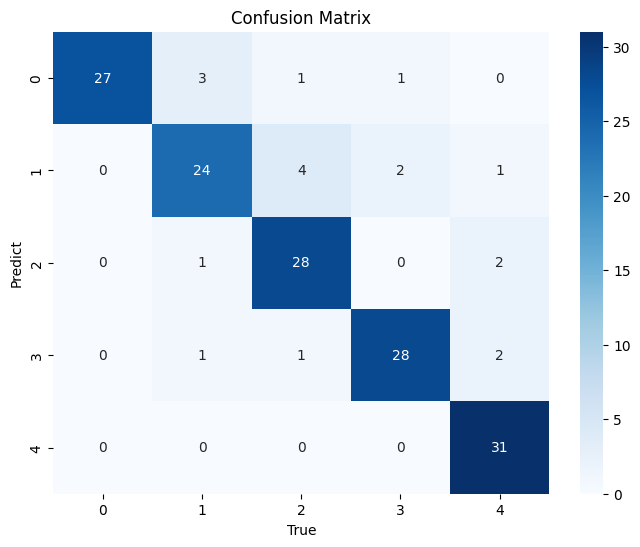

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

###XGBoost

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
param_grid = {
  "max_depth": [3, 5, 7],
  "learning_rate": [0.01, 0.1],
  "n_estimators": [100, 200],
  "gamma": [0, 0.1],
  "colsample_bytree": [0.7, 0.8],
}

In [ ]:
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

In [ ]:
xgb_model.fit(X_train_normal, y_train_normal)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]})

In [ ]:
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [ ]:
# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        32
         1.0       0.84      0.84      0.84        31
         2.0       0.88      0.97      0.92        31
         3.0       0.90      0.84      0.87        32
         4.0       0.97      0.94      0.95        31

    accuracy                           0.90       157
   macro avg       0.90      0.90      0.90       157
weighted avg       0.90      0.90      0.90       157



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.899}


In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

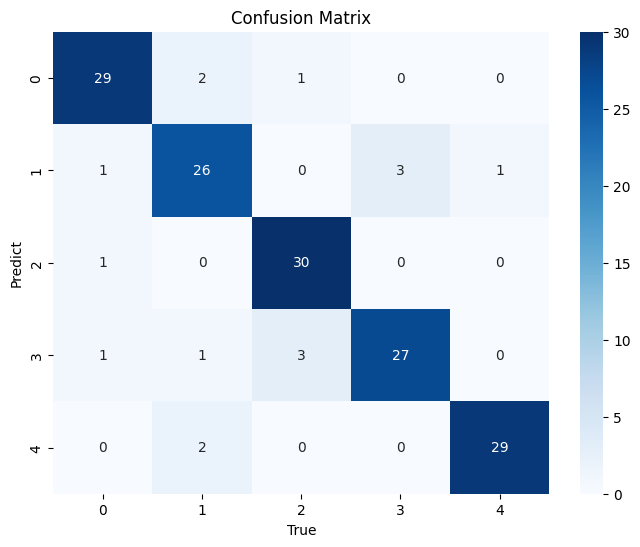

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

#Evaluasi

In [ ]:
import matplotlib.pyplot as plt

##Raw

In [ ]:
model_comp1 = pd.DataFrame({'Model': ['Decision -Tree', 'K-Nearest Neighbour','Random Forest',
                            'XGBoost'], 'Accuracy': [accuracy_tree*100, accuracy_knn*100,
                            accuracy_rf*100,accuracy_xgb*100]})

In [ ]:
model_comp1.head()

,Model,Accuracy
0,Decision -Tree,57.9
1,K-Nearest Neighbour,57.9
2,Random Forest,63.2
3,XGBoost,64.9


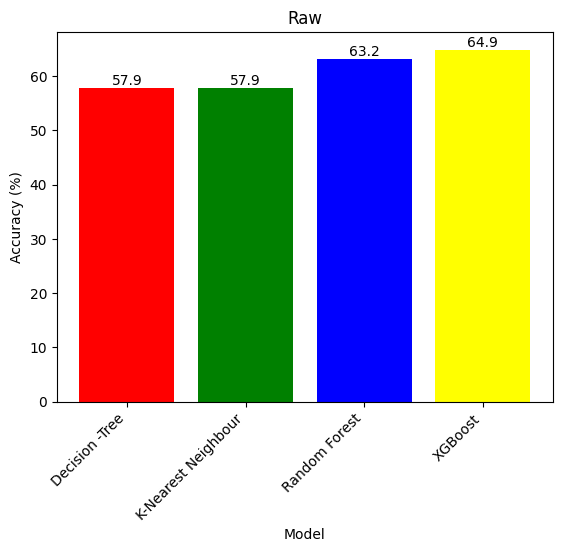

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Raw')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

##Oversample

In [ ]:
model_comp1 = pd.DataFrame({'Model': ['Decision -Tree', 'K-Nearest Neighbour','Random Forest',
                            'XGBoost'], 'Accuracy': [accuracy_tree_smote*100, accuracy_knn_smote*100,
                            accuracy_rf_smote*100,accuracy_xgb_smote*100]})

In [ ]:
model_comp1.head()

,Model,Accuracy
0,Decision -Tree,66.2
1,K-Nearest Neighbour,68.8
2,Random Forest,91.1
3,XGBoost,91.7


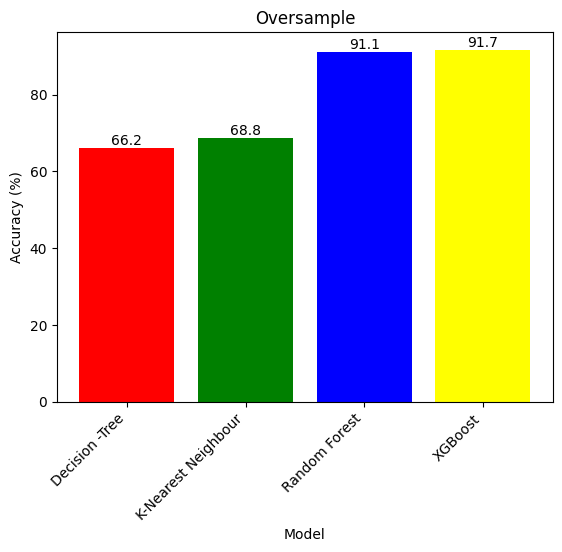

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

##Oversample + Normalization

In [ ]:
model_comp2 = pd.DataFrame({'Model': ['Decision Tree','K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_tree_smote_normal*100, accuracy_knn_smote_normal*100,
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})

model_comp2.head()

,Model,Accuracy
0,Decision Tree,68.8
1,K-Nearest Neighbour,80.3
2,Random Forest,91.1
3,XGBoost,91.7


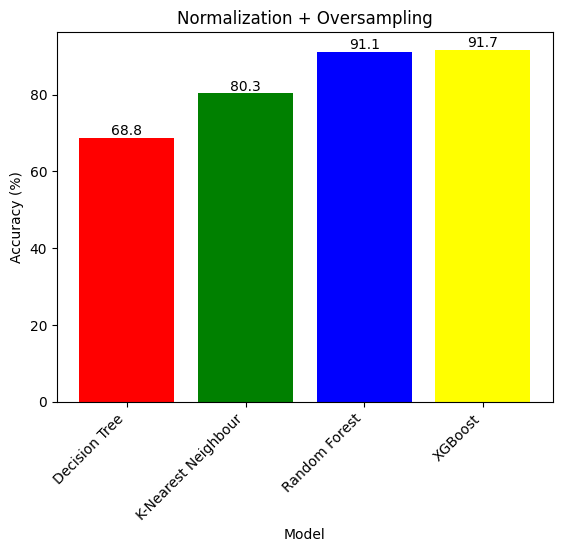

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

##Tunning + Normalization + Oversample

In [ ]:
model_comp3 = pd.DataFrame({'Model': ['Decision Tree','K-Nearest Neighbour','Random Forest',
                            'XGBoost'], 'Accuracy': [accuracy_tree_smote_normal_Tun*100, accuracy_knn_smote_normal_Tun*100,
                            accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})

model_comp3.head()

,Model,Accuracy
0,Decision Tree,75.2
1,K-Nearest Neighbour,87.9
2,Random Forest,93.0
3,XGBoost,89.8


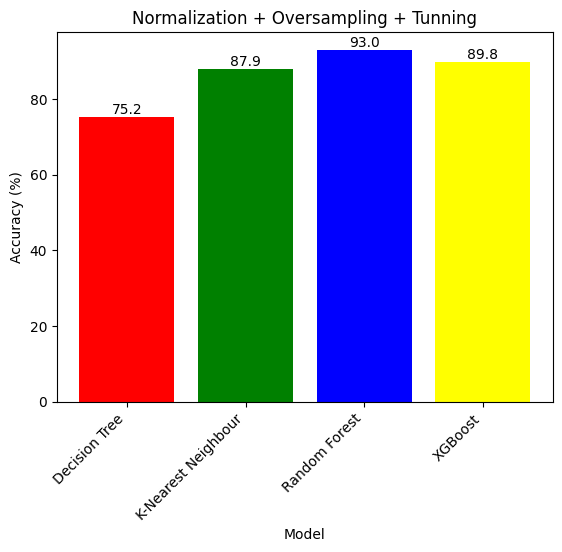

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue', 'yellow'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [ ]:
# Data frame
model_compBest = pd.DataFrame({
  'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
            'XGB OverSample Standarization Tunning'],
  'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100,
              accuracy_xgb_smote_normal_Tun*100]
})

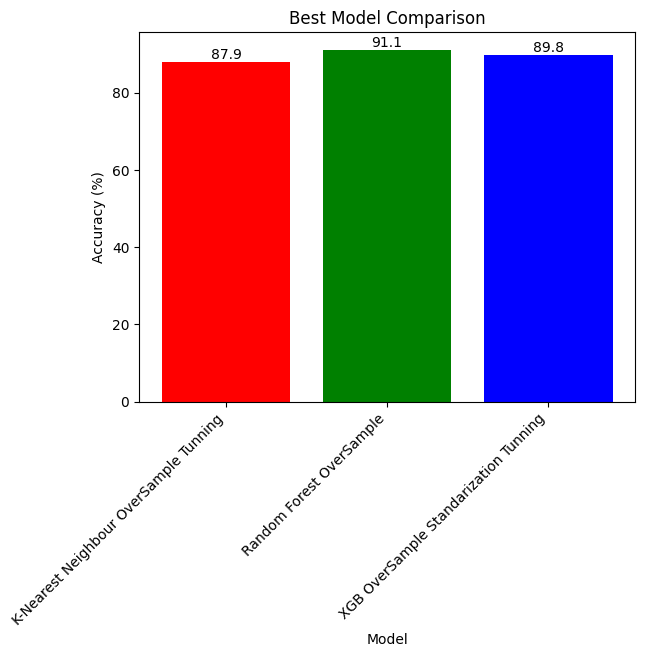

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()